In [7]:
import pandas as pd
import os
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

#Initialise repositories
_projroot = os.path.abspath('.')
_datadir = os.path.join(_projroot,'data')
_preprocesseddir = os.path.join(_datadir,'preprocesseddata')
_testdir = os.path.join(_datadir,'testdata')
_rawdir = os.path.join(_datadir,'rawdata')

In [8]:
WCC_Survey = pd.read_csv(os.path.join(_preprocesseddir,'WCCSurvey_comb.csv'))
WCC_Survey = WCC_Survey.drop('Unnamed: 0', axis = 1)
WCC_Survey.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/isabelle/Desktop/MScProject/Juptyer_files/data/preprocesseddata/WCCSurvey_comb.csv'

In [5]:
#Combine columns Part time due to low numbers of each. 
#Combinecolumns with <20 items into other 

WCC_Survey['Q3'] = WCC_Survey['Q3'].apply(lambda x:x if x not in ['Working - Part Time (8 - 16 HRS)','Working - Part Time (17 - 29 HRS)'] else "Working - Part Time (8-29 HRS)")
WCC_Survey['Q3'] = WCC_Survey['Q3'].apply(lambda x:x if x in ["Working - Full Time (30+ HRS)",
                                                        "Retired",
                                                        "Working - Part Time (8 - 29 HRS)",
                                                        "Unemployed, Not Registered-Seeking Work",
                                                        "Full-Time Student",
                                                        "Unemployed due to ill health"]
                                   else 'other')

In [6]:
#Replace 6 with Nan for N/A answers so as not to skew scale

Q5 = ["Q5a","Q5b","Q5c","Q5d","Q5e","Q5f","Q5g","Q5h","Q5i","Q5j","Q5k","Q5l"]
WCC_Survey[(WCC_Survey[Q5] == 6)] = np.nan
print(WCC_Survey[Q5])


      Q5a  Q5b  Q5c  Q5d  Q5e  Q5f  Q5g  Q5h  Q5i  Q5j  Q5k  Q5l
0     5.0  5.0  3.0  5.0  5.0  5.0  4.0  4.0  5.0  4.0  2.0  2.0
1     2.0  2.0  3.0  3.0  3.0  3.0  2.0  2.0  2.0  2.0  2.0  2.0
2     4.0  4.0  4.0  4.0  4.0  2.0  1.0  4.0  1.0  1.0  1.0  1.0
3     1.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  1.0  5.0  5.0  1.0
4     1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
1033  4.0  4.0  NaN  4.0  1.0  1.0  4.0  5.0  3.0  4.0  NaN  4.0
1034  1.0  1.0  NaN  NaN  1.0  NaN  3.0  5.0  1.0  1.0  NaN  1.0
1035  4.0  5.0  5.0  5.0  3.0  NaN  4.0  5.0  4.0  4.0  NaN  4.0
1036  3.0  3.0  3.0  4.0  1.0  NaN  5.0  4.0  3.0  4.0  NaN  3.0
1037  NaN  3.0  NaN  NaN  1.0  NaN  NaN  2.0  NaN  NaN  NaN  3.0

[1038 rows x 12 columns]


In [7]:
#Categorise Q8 as number of council services accessed
Q8 = ["Q8a","Q8b","Q8c","Q8d","Q8e","Q8f"]
WCC_Survey[Q8].fillna(0)
WCC_Survey['Number of council services accessed'] = WCC_Survey[Q8].sum(axis=1)
WCC_Survey.drop(Q8, axis =1, inplace = True)
print(WCC_Survey[Q5])

      Q5a  Q5b  Q5c  Q5d  Q5e  Q5f  Q5g  Q5h  Q5i  Q5j  Q5k  Q5l
0     5.0  5.0  3.0  5.0  5.0  5.0  4.0  4.0  5.0  4.0  2.0  2.0
1     2.0  2.0  3.0  3.0  3.0  3.0  2.0  2.0  2.0  2.0  2.0  2.0
2     4.0  4.0  4.0  4.0  4.0  2.0  1.0  4.0  1.0  1.0  1.0  1.0
3     1.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  1.0  5.0  5.0  1.0
4     1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
1033  4.0  4.0  NaN  4.0  1.0  1.0  4.0  5.0  3.0  4.0  NaN  4.0
1034  1.0  1.0  NaN  NaN  1.0  NaN  3.0  5.0  1.0  1.0  NaN  1.0
1035  4.0  5.0  5.0  5.0  3.0  NaN  4.0  5.0  4.0  4.0  NaN  4.0
1036  3.0  3.0  3.0  4.0  1.0  NaN  5.0  4.0  3.0  4.0  NaN  3.0
1037  NaN  3.0  NaN  NaN  1.0  NaN  NaN  2.0  NaN  NaN  NaN  3.0

[1038 rows x 12 columns]


In [8]:
#Categorise Q11 as mean information about council services

Q11 = ["Q11a","Q11b","Q11c","Q11d","Q11e"]

WCC_Survey[WCC_Survey[Q11].gt(4)] = np.nan
WCC_Survey['Information about public services'] = WCC_Survey[Q11].mean(axis=1, skipna = True)

WCC_Survey.drop(Q11, axis =1, inplace = True)
print(WCC_Survey[Q5])

      Q5a  Q5b  Q5c  Q5d  Q5e  Q5f  Q5g  Q5h  Q5i  Q5j  Q5k  Q5l
0     5.0  5.0  3.0  5.0  5.0  5.0  4.0  4.0  5.0  4.0  2.0  2.0
1     2.0  2.0  3.0  3.0  3.0  3.0  2.0  2.0  2.0  2.0  2.0  2.0
2     4.0  4.0  4.0  4.0  4.0  2.0  1.0  4.0  1.0  1.0  1.0  1.0
3     1.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  1.0  5.0  5.0  1.0
4     1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
1033  4.0  4.0  NaN  4.0  1.0  1.0  4.0  5.0  3.0  4.0  NaN  4.0
1034  1.0  1.0  NaN  NaN  1.0  NaN  3.0  5.0  1.0  1.0  NaN  1.0
1035  4.0  5.0  5.0  5.0  3.0  NaN  4.0  5.0  4.0  4.0  NaN  4.0
1036  3.0  3.0  3.0  4.0  1.0  NaN  5.0  4.0  3.0  4.0  NaN  3.0
1037  NaN  3.0  NaN  NaN  1.0  NaN  NaN  2.0  NaN  NaN  NaN  3.0

[1038 rows x 12 columns]


In [9]:
#Categorise Q12 as access online council content, access offline council content, don't access council content

Q12 = ["Q12a","Q12b","Q12c","Q12d","Q12e","Q12f","Q12g","Q12h","Q12i","Q12j","Q12k","Q12l"]
Q12_online = ["Q12d","Q12e","Q12g","Q12h","Q12j"]
Q12_offline = ["Q12a","Q12b","Q12c","Q12f","Q12i"]
Q12_none = ["Q12k"]
Q12_dontknow = ["Q12l"]

WCC_Survey['Q12 Online'] = WCC_Survey[Q12_online].sum(axis=1)
WCC_Survey['Q12 Offline'] = WCC_Survey[Q12_offline].sum(axis=1)
Q12_new = ['Q12 Online', 'Q12 Offline']


column = []

for i in range(0,len(WCC_Survey['Q12a'])):
    if WCC_Survey.loc[i,'Q12 Online'] > 0:
        if WCC_Survey.loc[i,'Q12 Offline'] > 0:
            column.append("Online and Offline")
        else:
            column.append('Online')
    elif WCC_Survey.loc[i,'Q12 Offline'] > 0: 
        column.append('Offline')
    elif WCC_Survey.loc[i,'Q12k'] > 0:  
        column.append('None')
    else:
        column.append('Dont know')

WCC_Survey["Publication Use"] = column            
WCC_Survey.drop(Q12, axis =1, inplace = True)
WCC_Survey.drop(Q12_new, axis =1, inplace = True)
WCC_Survey.shape
print(WCC_Survey[Q5])

      Q5a  Q5b  Q5c  Q5d  Q5e  Q5f  Q5g  Q5h  Q5i  Q5j  Q5k  Q5l
0     5.0  5.0  3.0  5.0  5.0  5.0  4.0  4.0  5.0  4.0  2.0  2.0
1     2.0  2.0  3.0  3.0  3.0  3.0  2.0  2.0  2.0  2.0  2.0  2.0
2     4.0  4.0  4.0  4.0  4.0  2.0  1.0  4.0  1.0  1.0  1.0  1.0
3     1.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  1.0  5.0  5.0  1.0
4     1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
1033  4.0  4.0  NaN  4.0  1.0  1.0  4.0  5.0  3.0  4.0  NaN  4.0
1034  1.0  1.0  NaN  NaN  1.0  NaN  3.0  5.0  1.0  1.0  NaN  1.0
1035  4.0  5.0  5.0  5.0  3.0  NaN  4.0  5.0  4.0  4.0  NaN  4.0
1036  3.0  3.0  3.0  4.0  1.0  NaN  5.0  4.0  3.0  4.0  NaN  3.0
1037  NaN  3.0  NaN  NaN  1.0  NaN  NaN  2.0  NaN  NaN  NaN  3.0

[1038 rows x 12 columns]


In [10]:
#Categorise Q13 as usefulness of online council content, usefulness of council content

Q13 = ["Q13a","Q13b","Q13c","Q13d","Q13e","Q13f","Q13g","Q13h","Q13i","Q13j"]
Q13_online = ["Q13d","Q13e","Q13g","Q13h","Q13j"]
Q13_offline = ["Q13a","Q13b","Q13c","Q13f","Q13i"]


WCC_Survey['Usefulness of online publication'] = WCC_Survey[Q13_online].mean(axis=1, skipna = True)
WCC_Survey['Usefulness of offline publication'] = WCC_Survey[Q13_offline].mean(axis=1, skipna = True)

WCC_Survey.drop(Q13, axis =1, inplace = True)
print(WCC_Survey[Q5])

      Q5a  Q5b  Q5c  Q5d  Q5e  Q5f  Q5g  Q5h  Q5i  Q5j  Q5k  Q5l
0     5.0  5.0  3.0  5.0  5.0  5.0  4.0  4.0  5.0  4.0  2.0  2.0
1     2.0  2.0  3.0  3.0  3.0  3.0  2.0  2.0  2.0  2.0  2.0  2.0
2     4.0  4.0  4.0  4.0  4.0  2.0  1.0  4.0  1.0  1.0  1.0  1.0
3     1.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  1.0  5.0  5.0  1.0
4     1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
1033  4.0  4.0  NaN  4.0  1.0  1.0  4.0  5.0  3.0  4.0  NaN  4.0
1034  1.0  1.0  NaN  NaN  1.0  NaN  3.0  5.0  1.0  1.0  NaN  1.0
1035  4.0  5.0  5.0  5.0  3.0  NaN  4.0  5.0  4.0  4.0  NaN  4.0
1036  3.0  3.0  3.0  4.0  1.0  NaN  5.0  4.0  3.0  4.0  NaN  3.0
1037  NaN  3.0  NaN  NaN  1.0  NaN  NaN  2.0  NaN  NaN  NaN  3.0

[1038 rows x 12 columns]


In [11]:
#Categorise Q14 as online, offline, both, none, don't know


Q14 = ["Q14a","Q14b","Q14c","Q14d","Q14e","Q14f","Q14g","Q14h","Q14i","Q14j","Q14k","Q14l","Q14m"]
Q14_online = ["Q14a","Q14b","Q14c","Q14i"]
Q14_offline = ["Q14d","Q14e","Q14f","Q14g","Q14h"]
Q14_none = ["Q14k"]
Q12_dontknow = ["Q14l"]
print(WCC_Survey['Q14a'])
WCC_Survey['Q14 Online'] = WCC_Survey[Q14_online].to_numeric().sum(axis=1)
WCC_Survey['Q14 Offline'] = WCC_Survey[Q14_offline].to_numeric().sum(axis=1)
Q14_new = ['Q14 Online', 'Q14 Offline']


column = []

for i in range(0,len(WCC_Survey['Q14a'])):
    if WCC_Survey.loc[i,'Q14 Online'] > 0:
        if WCC_Survey.loc[i,'Q14 Offline'] > 0:
            column.append("Online and Offline")
        else:
            column.append('Online')
    elif WCC_Survey.loc[i,'Q14 Offline'] > 0: 
        column.append('Offline')
    elif WCC_Survey.loc[i,'Q14k'] > 0:  
        column.append('None')
    else:
        column.append('Dont know')

WCC_Survey["Preferred Contact"] = column            
WCC_Survey.drop(Q14, axis =1, inplace = True)
WCC_Survey.drop(Q14_new, axis =1, inplace = True)
WCC_Survey.shape
print(WCC_Survey[Q5])

KeyError: 'Q14a'

In [12]:
#Replace 10 with Nan for N/A answers so as not to skew scale
WCC_Survey[(WCC_Survey[['Q21']] == 5)] = np.nan


In [13]:
#Replace 10 with Nan for N/A answers so as not to skew scale
WCC_Survey[(WCC_Survey[['Q25']] == 10)] = np.nan

In [14]:
#Categorise Q26 as concerned about paying bills/ not concerned


Q26_Worry = ["Q26a","Q26b","Q26c","Q26d","Q26e","Q26f","Q26g","Q26h"]
Q26 = ["Q26a","Q26b","Q26c","Q26d","Q26e","Q26f","Q26g","Q26h","Q26i","Q26j","Q26k"]

WCC_Survey['Financial Worry'] = WCC_Survey[Q26_Worry].sum(axis=1)
WCC_Survey['Financial Worry'].fillna(0)

WCC_Survey['Financial Worry'][(WCC_Survey['Financial Worry'].gt(0))] = "1" #1 if concerned
WCC_Survey['Financial Worry'][(WCC_Survey['Financial Worry'] == 0)] = "0" #0 if not concerned

WCC_Survey.drop(Q26, axis =1, inplace = True)
print(WCC_Survey[Q5])

      Q5a  Q5b  Q5c  Q5d  Q5e  Q5f  Q5g  Q5h  Q5i  Q5j  Q5k  Q5l
0     5.0  5.0  3.0  5.0  5.0  5.0  4.0  4.0  5.0  4.0  2.0  2.0
1     2.0  2.0  3.0  3.0  3.0  3.0  2.0  2.0  2.0  2.0  2.0  2.0
2     4.0  4.0  4.0  4.0  4.0  2.0  1.0  4.0  1.0  1.0  1.0  1.0
3     1.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  1.0  5.0  5.0  1.0
4     1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
1033  4.0  4.0  NaN  4.0  1.0  1.0  4.0  5.0  3.0  4.0  NaN  4.0
1034  1.0  1.0  NaN  NaN  1.0  NaN  3.0  5.0  1.0  1.0  NaN  1.0
1035  4.0  5.0  5.0  5.0  3.0  NaN  4.0  5.0  4.0  4.0  NaN  4.0
1036  3.0  3.0  3.0  4.0  1.0  NaN  5.0  4.0  3.0  4.0  NaN  3.0
1037  NaN  3.0  NaN  NaN  1.0  NaN  NaN  2.0  NaN  NaN  NaN  3.0

[1038 rows x 12 columns]


<ipython-input-14-8434f16dda91>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WCC_Survey['Financial Worry'][(WCC_Survey['Financial Worry'].gt(0))] = "1" #1 if concerned


In [17]:
#Change Q31 classification to NHS, private or none
WCC_Survey['Q31'][WCC_Survey[['Q31'].str.contains('Private', 'NHS')==False]]= 0 #0 if no GP
print(WCC_Survey['Q31'])
WCC_Survey['Q31'][(WCC_Survey['Q31'].str.contains('NHS', na = False))] = 1 #1 if NHS
WCC_Survey['Q31'][(WCC_Survey['Q31'].str.contains('Private', na = False))] = 2 #2 if private


print(WCC_Survey[Q5])

AttributeError: 'list' object has no attribute 'str'

In [16]:
#Replace 4 with Nan for Prefer not to sat answers so as not to skew scale
Q36 = ['Q36a','Q36b','Q36c']
WCC_Survey[(WCC_Survey[Q36] == 4)] = np.nan

In [54]:
#Replace 10 with Nan for N/A answers so as not to skew scale
WCC_Survey[(WCC_Survey[['Q38']] == 10)] = np.nan

In [55]:
WCC_Survey.count(numeric_only = False)

Target                                 1038
AGE                                     913
S1                                     1038
Q3                                     1038
Q4                                     1038
Q5a                                    1034
Q5b                                    1034
Q5c                                     811
Q5d                                    1019
Q5e                                     930
Q5f                                     556
Q5g                                    1032
Q5h                                    1034
Q5i                                    1031
Q5j                                    1030
Q5k                                     470
Q5l                                    1032
Q20                                    1037
Q21                                    1020
Q22                                    1038
Q25                                    1038
Q27                                    1034
Q28                             

In [56]:
#Check whether data with many values missing is missing at random
WCC_Survey.groupby(WCC_Survey['Q5f'].isnull()).mean()

,Target,AGE,Q5a,Q5b,Q5c,Q5d,Q5e,Q5f,Q5g,Q5h,...,Q34,Q35,Q36a,Q36b,Q36c,Q38,Number of council services accessed,Information about public services,Usefulness of online publication,Usefulness of offline publication
Q5f,,,,,,,,,,,,,,,,,,,,,
False,0.055755,44.321429,3.219424,3.149550,2.923077,3.099638,2.610603,2.847122,3.016187,3.109712,...,8.595324,4.401079,1.190476,1.129326,1.151184,7.686025,0.066547,2.160703,1.667355,1.984921
True,0.093361,44.513447,3.826360,3.949896,3.564669,3.978587,2.590078,NaN,3.605042,3.780335,...,8.541494,4.964730,1.324211,1.296842,1.286316,7.731343,0.190871,2.273972,1.577660,1.985974


In [57]:
#Check whether data with many values missing is missing at random
WCC_Survey.groupby(WCC_Survey['Q5k'].isnull()).mean()

,Target,AGE,Q5a,Q5b,Q5c,Q5d,Q5e,Q5f,Q5g,Q5h,...,Q34,Q35,Q36a,Q36b,Q36c,Q38,Number of council services accessed,Information about public services,Usefulness of online publication,Usefulness of offline publication
Q5k,,,,,,,,,,,,,,,,,,,,,
False,0.044681,41.129808,3.006383,3.008511,2.693878,2.976242,2.194896,2.409091,2.711538,2.844350,...,8.736170,3.927660,1.184946,1.124464,1.143777,7.596070,0.089362,2.125165,1.750000,1.976608
True,0.096831,47.150905,3.911348,3.946809,3.622912,3.940647,2.953908,3.486726,3.765957,3.897345,...,8.433099,5.271127,1.309353,1.275986,1.272401,7.797153,0.153169,2.284643,1.546296,1.991701


In [58]:
#Check whether data with many values missing is missing at random
WCC_Survey.groupby(WCC_Survey['Usefulness of online publication'].isnull()).mean()

,Target,AGE,Q5a,Q5b,Q5c,Q5d,Q5e,Q5f,Q5g,Q5h,...,Q34,Q35,Q36a,Q36b,Q36c,Q38,Number of council services accessed,Information about public services,Usefulness of online publication,Usefulness of offline publication
Usefulness of online publication,,,,,,,,,,,,,,,,,,,,,
False,0.039832,43.690476,3.761006,3.865546,3.549333,3.788009,2.861771,3.359504,3.593291,3.746331,...,8.538784,5.165618,1.196581,1.182979,1.168085,7.741053,0.054507,2.153503,1.623166,1.920533
True,0.101604,45.141907,3.276481,3.225806,2.850917,3.260870,2.344754,2.452229,3.025225,3.140036,...,8.597148,4.235294,1.300181,1.227437,1.252708,7.677064,0.183601,2.264798,NaN,2.043196


In [59]:
WCC_Survey.drop(['Q5f','Q5k','Usefulness of online publication'], axis = 1, inplace = True)

In [40]:
WCC_Survey.to_csv(os.path.join(_preprocesseddir, "WCC_Num_Compress.csv"))

In [358]:
cont = WCC_Survey.select_dtypes(exclude=['object'])
cat = WCC_Survey.select_dtypes(exclude=['float64', 'int'])
cat['Target'] = WCC_Survey['Target']

<ipython-input-358-2cfd19070a14>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['Target'] = WCC_Survey['Target']


In [328]:
cont.describe()

,Target,AGE,Q5a,Q5b,Q5c,Q5d,Q5e,Q5f,Q5g,Q5h,...,Q34,Q35,Q36a,Q36b,Q36c,Q38,Number of council services accessed,Information about public services,Usefulness of online publication,Usefulness of offline publication
count,974.000000,864.000000,971.000000,970.000000,765.000000,958.000000,879.000000,525.000000,969.000000,971.000000,...,974.000000,974.000000,961.000000,964.000000,965.000000,974.000000,974.000000,953.000000,444.000000,778.000000
mean,0.073922,44.695602,3.462410,3.480412,3.133333,3.464509,2.535836,2.809524,3.242518,3.373841,...,8.569815,4.539014,1.255983,1.212656,1.216580,7.706366,0.127310,2.203165,1.634572,1.992931
std,0.261778,15.759157,1.427772,1.358430,1.474211,1.330572,1.478248,1.463912,1.430197,1.343674,...,1.489515,2.521035,0.505210,0.475141,0.466441,1.894987,0.418255,0.737431,0.734414,0.880124
min,0.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,32.000000,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,2.000000,2.000000,...,8.000000,2.000000,1.000000,1.000000,1.000000,7.000000,0.000000,1.800000,1.000000,1.500000
50%,0.000000,43.000000,4.000000,4.000000,3.000000,4.000000,2.000000,3.000000,3.000000,4.000000,...,9.000000,4.000000,1.000000,1.000000,1.000000,9.000000,0.000000,2.000000,1.875000,2.000000
75%,0.000000,56.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,...,9.000000,6.000000,1.000000,1.000000,1.000000,9.000000,0.000000,2.800000,2.000000,2.000000
max,1.000000,94.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,12.000000,12.000000,3.000000,3.000000,3.000000,9.000000,3.000000,4.000000,6.000000,6.000000


In [329]:
cont.corr().to_csv(os.path.join(_preprocesseddir,"WCC_Correlation.csv"))

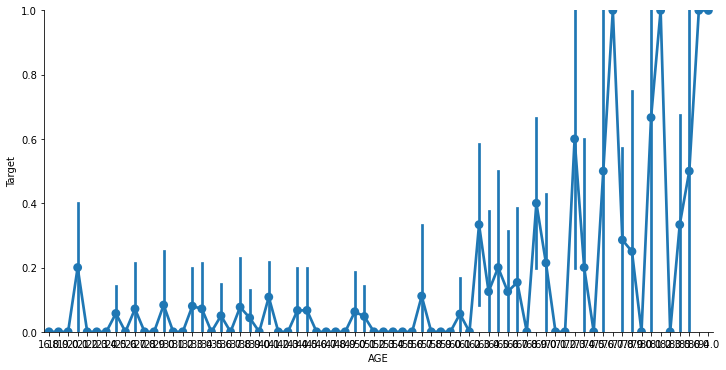

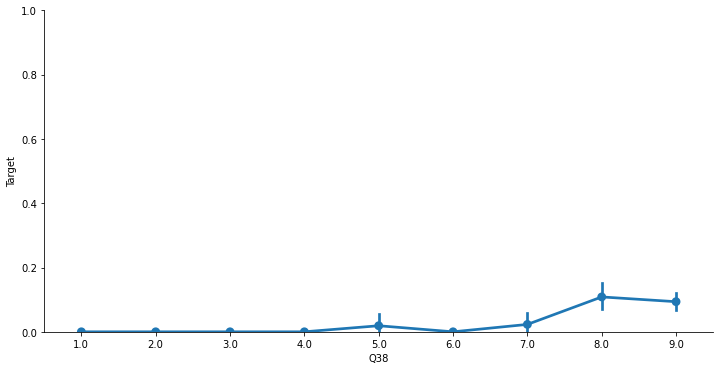

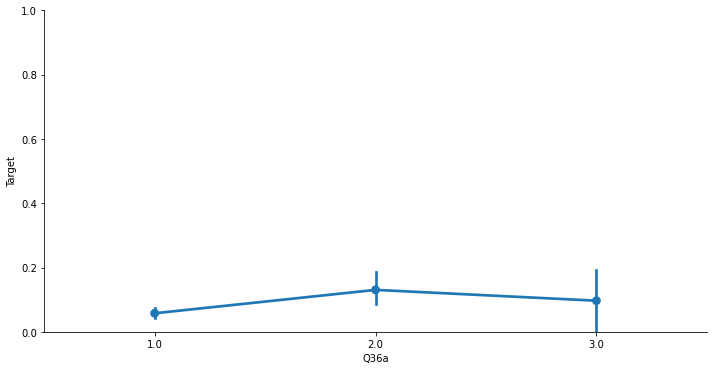

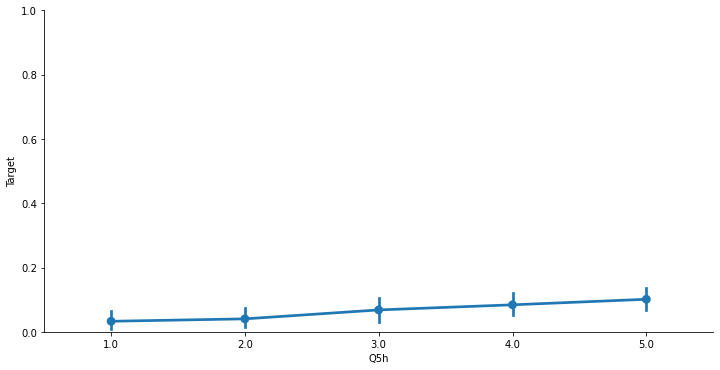

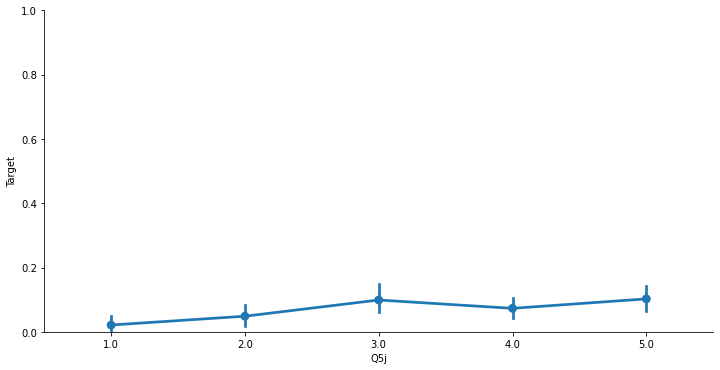

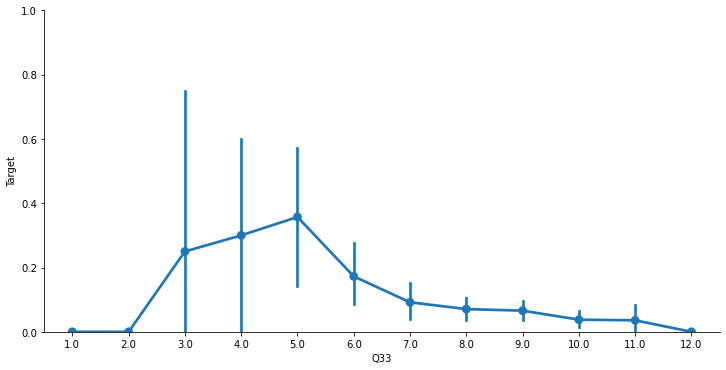

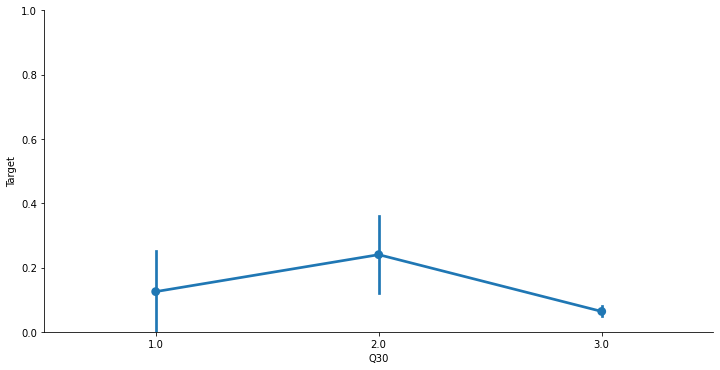

In [330]:
# Generate categorical plots for ordinal features
for col in ['AGE', 'Q38', 'Q36a','Q5h','Q5j','Q33','Q30']:
    sns.catplot(x=col, y='Target', data=cont, kind='point', aspect=2, )
    plt.ylim(0, 1)

/Users/isabelle/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


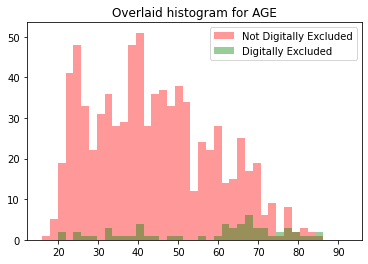

/Users/isabelle/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


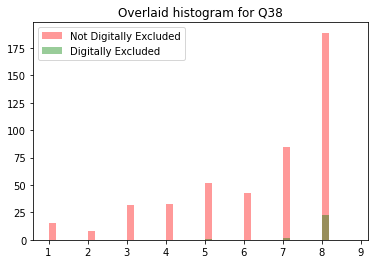

/Users/isabelle/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


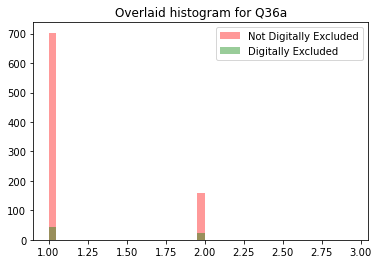

/Users/isabelle/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


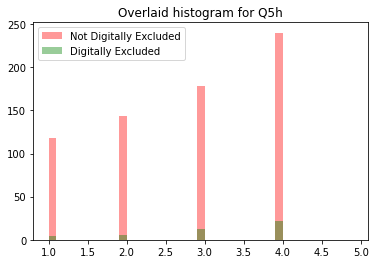

/Users/isabelle/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


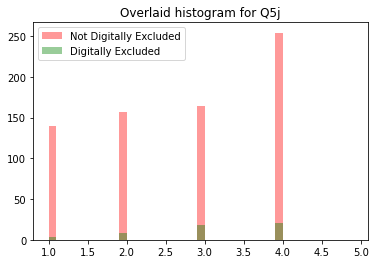

/Users/isabelle/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


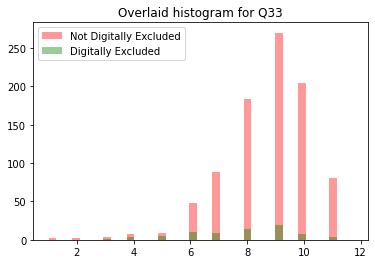

/Users/isabelle/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


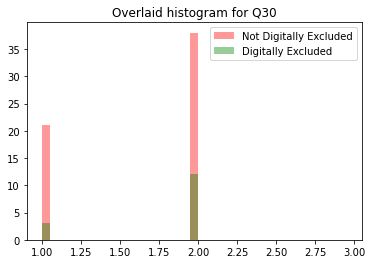

In [331]:
# Plot overlaid histograms for continuous features
for i in ['AGE', 'Q38', 'Q36a','Q5h','Q5j','Q33','Q30']:
    died = list(cont[cont['Target'] == 0][i].dropna())
    survived = list(cont[cont['Target'] == 1][i].dropna())
    xmin = min(min(died), min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax - xmin) / 40
    sns.distplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['Not Digitally Excluded', 'Digitally Excluded'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

In [332]:
cat.isnull().sum()

S1                  64
Q3                  64
Q4                  64
Q22                 64
Q29                 64
Q31                 64
Q37a               257
Postcode_clean      64
Ward                65
OutputArea         102
Publication Use     64
Financial Worry     17
Target              64
dtype: int64

In [333]:
#number of unique values per feature
for col in cat.columns:
    print("{}: {} unique values".format(col, cat[col].nunique()))

S1: 2 unique values
Q3: 12 unique values
Q4: 20 unique values
Q22: 6 unique values
Q29: 3 unique values
Q31: 6 unique values
Q37a: 1 unique values
Postcode_clean: 352 unique values
Ward: 20 unique values
OutputArea: 198 unique values
Publication Use: 5 unique values
Financial Worry: 2 unique values
Target: 2 unique values


In [334]:
#Check exclusion by employment
cat.groupby('Q3').mean()
cat['Q3'].value_counts()

Working - Full Time (30+ HRS)                     545
Retired                                           118
Working - Part Time (8 - 16 HRS)                   92
Unemployed, Not Registered-Seeking Work            74
Full-Time Student                                  65
Unemployed due to ill health                       34
Registered Unemployed (Job Seeker's Allowance)     18
Working - Part Time (17 - 29 HRS)                  16
Self employed                                       5
Carer                                               3
On a work programme / Apprenticeship                2
Home maker                                          2
Name: Q3, dtype: int64

In [335]:
cat.groupby('Q4').mean()
cat['Q4'].value_counts()

White - British                                                  428
Black or Black British - African                                  77
White - Western European (type in)                                60
Black or Black British -  Caribbean                               58
Asian or Asian British - Any other Asian Background (type in)     44
Any - Other White background (type in)                            40
White - Eastern European  (type in)                               39
Asian or Asian British - Indian                                   35
Asian or Asian British - Bangladeshi                              30
White - Irish                                                     25
Asian or Asian British - Pakistani                                24
Other Ethnic groups - Arab                                        23
Mixed - White and Black - Caribbean                               19
Asian or Asian British - Chinese                                  19
Mixed - White and Black - African 

In [336]:
cat.groupby('Q22').mean()
cat['Q22'].value_counts()

Rents (With Or Without Housing Benefit)        644
Owns Outright                                  180
Owns With A Mortgage Or Loan                    89
Live Here Rent Free                             22
Rents A Room In A Shared Property               21
Part Owns And Part Rents (shared Ownership)     18
Name: Q22, dtype: int64

,Target
Q31,
(Don't know),0.000000
NHS GP Elsewhere in London,0.000000
NHS GP Outside of London but in the UK,0.000000
NHS GP in the Westminster City Council Area,0.080645
None of these,0.068966
Private GP in Westminster/Elsewhere,0.000000


In [360]:
#Change Q31 classification to NHS, private or none
cat['Q31'][(cat['Q31'].str.contains('NHS', na = False))] = 'NHS'
cat['Q31'][(cat['Q31'].str.contains('Private', na = False))] = 'Private'
cat.groupby('Q31').mean()

<ipython-input-360-cff43a12b3c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['Q31'][(cat['Q31'].str.contains('NHS', na = False))] = 'NHS'
/Users/isabelle/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
<ipython-input-360-cff43a12b3c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['Q31'][(cat['Q31'].str.contains('Pr

,Target
Q31,
(Don't know),0.000000
NHS,0.076132
None of these,0.064516
Private,0.000000


In [338]:
cat.groupby('Q37a').mean()

,Target
Q37a,
UK,0.087068


In [339]:
cat.groupby('Postcode_clean').mean()

,Target
Postcode_clean,
NW14RH,0.000000
NW14SN,0.000000
NW15AX,0.000000
NW15AY,0.500000
NW15AZ,0.333333
...,...
WC2B4BS,0.000000
WC2B4BX,0.000000
WC2B5SD,0.000000


In [340]:
cat['Q3'] = cat['Q3'].apply(lambda x:x if x not in ['Working - Part Time (8 - 16 HRS)','Working - Part Time (17 - 29 HRS)'] else "Working - Part Time (8-29 HRS)")
cat['Q3'] = cat['Q3'].apply(lambda x:x if x in ["Working - Full Time (30+ HRS)",
                                                        "Retired",
                                                        "Working - Part Time (8 - 16 HRS)",
                                                        "Unemployed, Not Registered-Seeking Work",
                                                        "Full-Time Student",
                                                        "Unemployed due to ill health"]
                                   else 'other')

<ipython-input-340-51967a4d7b23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['Q3'] = cat['Q3'].apply(lambda x:x if x not in ['Working - Part Time (8 - 16 HRS)','Working - Part Time (17 - 29 HRS)'] else "Working - Part Time (8-29 HRS)")
<ipython-input-340-51967a4d7b23>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['Q3'] = cat['Q3'].apply(lambda x:x if x in ["Working - Full Time (30+ HRS)",


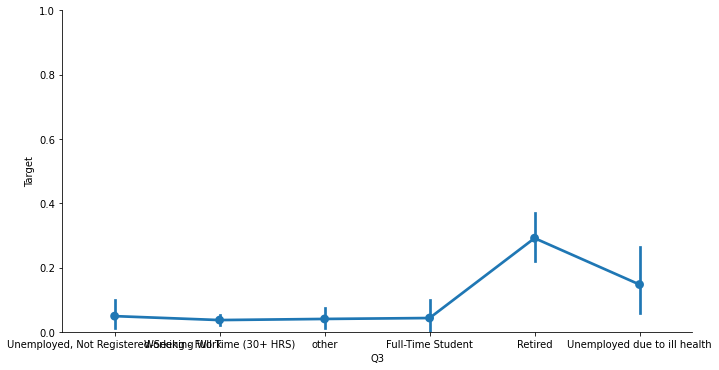

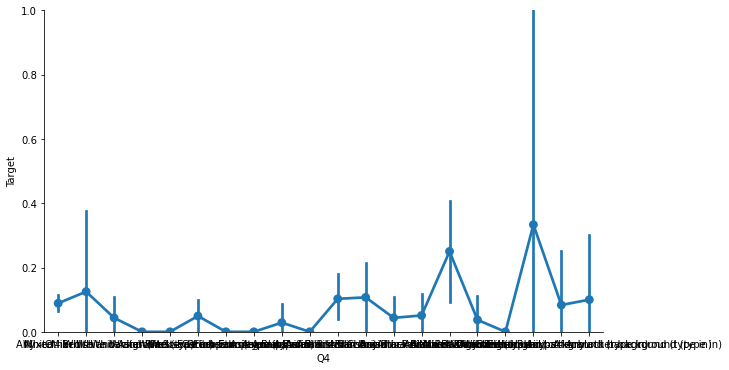

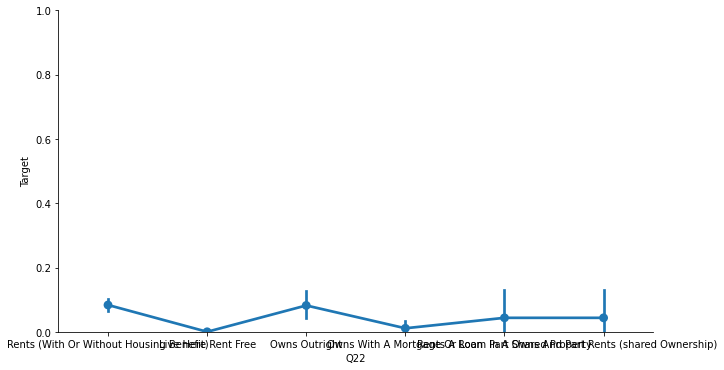

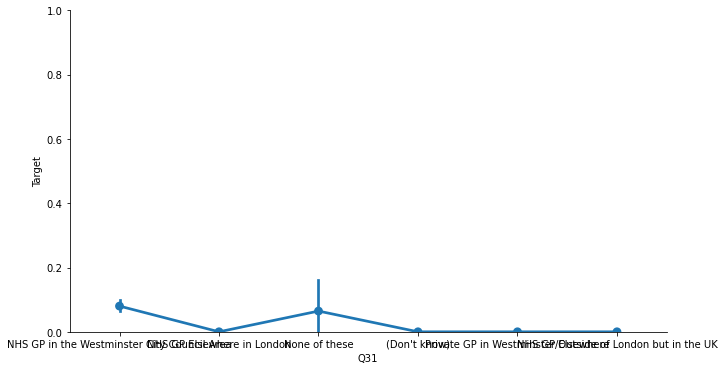

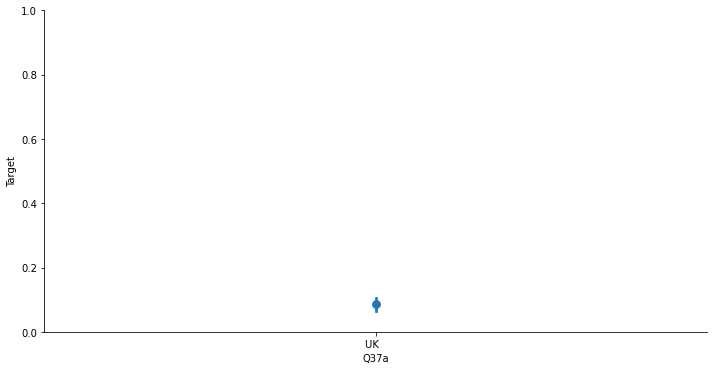

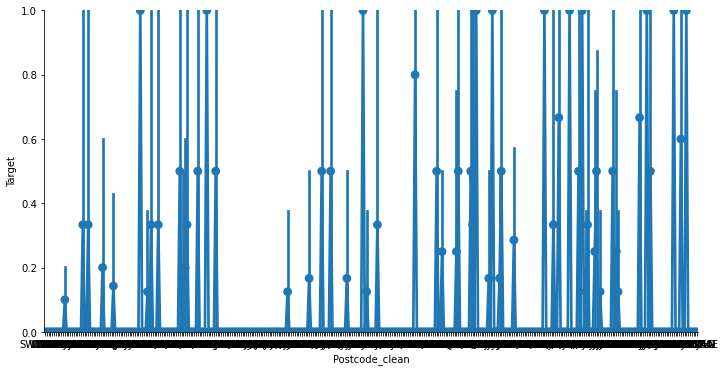

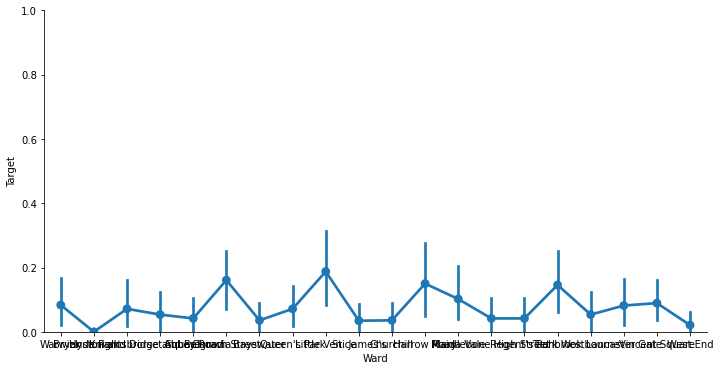

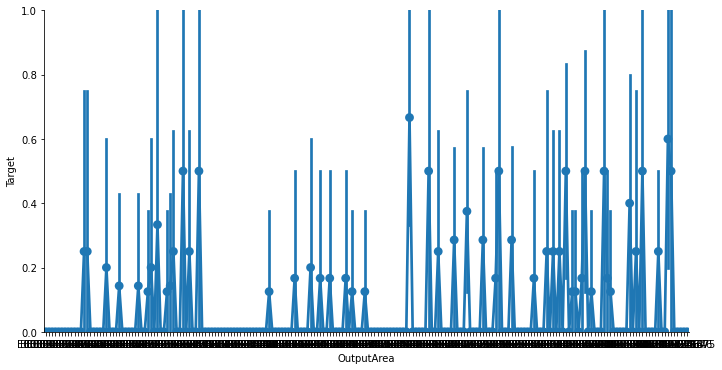

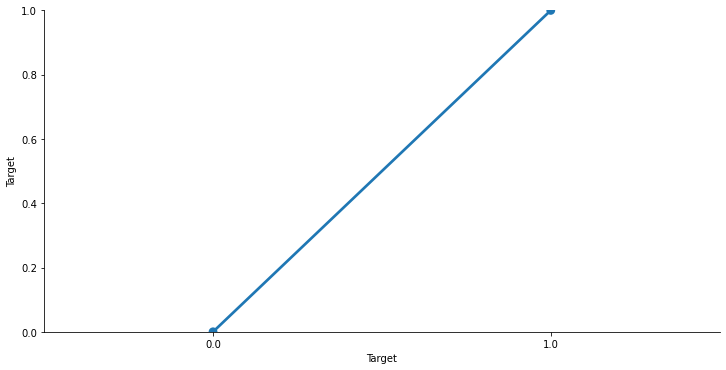

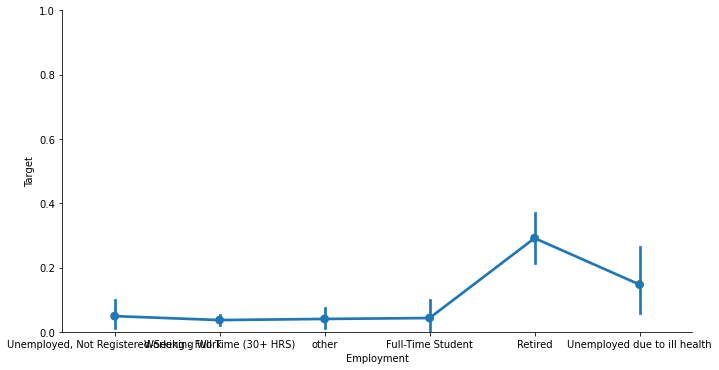

In [35]:
for col in cat.columns:
    sns.catplot(x=col, y='Target', data=cat, kind='point', aspect=2, )
    plt.ylim(0, 1)